# Assignment 1: Behavioral Analysis of Memory Search

Please submit this assignment to Canvas as a Jupyter notebook (.ipynb). The assignment begins with introductory material interspersed with optional (but recommended) exercises which will not be graded. The graded assignment may be found at the bottom of the document in the section labeled "Assignment X".

## Explore the RAM database

The CML's database of intracranial and scalp EEG comes in a pandas dataframe format. All the pertinent data about each experimental session is recorded in a row of a dataframe. The distributed example data consists of 20 intracranial EEG participants in FR1 (an intracranial free-recall experiment) and catFR1 (a categorized free-recall experiment).

Let's load the example database to get a better sense of this data format. We're going to use the **CMLReader** class found in the cmlreaders library (installed on the *workshop* environment that you should be completing this assignment on), which will load the data needed for this course.

In [2]:
# First, our import statements.
import pandas as pd
import numpy as np
import cmlreaders as cml

# We load the dataframe for all sessions.
df = cml.get_data_index()

In [3]:
# This dataframe contains index information about the experimental sessions in the example dataset.
df[:10]

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
0,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,0,NaN,NaN,0,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
1,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,1,NaN,NaN,1,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
2,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,10,NaN,NaN,10,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
3,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,11,NaN,NaN,11,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
4,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,12,NaN,NaN,12,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
5,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,13,NaN,NaN,13,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
6,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,14,NaN,NaN,14,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
7,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,15,NaN,NaN,15,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
8,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,16,NaN,NaN,16,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
9,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,17,NaN,NaN,17,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...


In [4]:
# Let's see what experiments we have access to
df['experiment'].unique()

array(['ltpFR', 'ltpFR2', 'VFFR', 'ltpRepFR', 'NiclsCourierClosedLoop',
       'NiclsCourierReadOnly', 'ltpDBOY1', 'prelim', 'FR1', 'FR2', 'PAL1',
       'YC1', 'PAL2', 'catFR1', 'YC2', 'catFR2', 'PS1', 'PS3', 'PS2',
       'TH1', 'FR3', 'PS2.1', 'PAL3', 'TH3', 'OPS', 'RepFR1', 'catFR3',
       'FR5', 'PS4_catFR', 'THR', 'PS4_FR', 'PAL5', 'THR1', 'catFR5',
       'PS4_catFR5', 'FR6', 'PS5_catFR', 'catFR6', 'TICL_FR',
       'LocationSearch', 'TICL_catFR', 'DBOY1', 'RepFR2',
       'EFRCourierOpenLoop', 'EFRCourierReadOnly', 'pyFR'], dtype=object)

**Exercise: How many sessions in the example data were run on Jefferson subjects? (Hint: The last letter of the subject code is for the hospital location)**

In [5]:
n = np.sum(pd.Series(df.subject).str.startswith('R'))
print(f'All RAM sessions: {n}')

All RAM sessions: 2767


In [6]:
n = np.sum(np.array(pd.Series(df.subject).str.startswith('R')) & np.array(pd.Series(df.subject).str.endswith('J')))
print(f'All Jefferson sessions: {n}')

All Jefferson sessions: 586


### Overview of some CML intracranial experiments

### Verbal free-recall tasks
* FR1
* catFR1

### Paired-associates tasks
* PAL1 (no stim)

### Spatial navigation tasks
* YC1
* TH1
* THR
* THR1

In [7]:
# And now let's find all the subjects who did the FR1 task
fr1_df = df.query('experiment == "FR1"')
fr1_df['subject'].unique()

array(['R1001P', 'R1002P', 'R1003P', 'R1006P', 'R1010J', 'R1015J',
       'R1018P', 'R1020J', 'R1022J', 'R1023J', 'R1026D', 'R1027J',
       'R1030J', 'R1031M', 'R1032D', 'R1033D', 'R1034D', 'R1035M',
       'R1036M', 'R1039M', 'R1042M', 'R1044J', 'R1045E', 'R1048E',
       'R1049J', 'R1050M', 'R1051J', 'R1052E', 'R1053M', 'R1054J',
       'R1056M', 'R1057E', 'R1059J', 'R1060M', 'R1061T', 'R1062J',
       'R1063C', 'R1065J', 'R1066P', 'R1067P', 'R1068J', 'R1069M',
       'R1070T', 'R1074M', 'R1075J', 'R1076D', 'R1077T', 'R1080E',
       'R1081J', 'R1083J', 'R1084T', 'R1086M', 'R1089P', 'R1092J',
       'R1093J', 'R1094T', 'R1096E', 'R1098D', 'R1100D', 'R1101T',
       'R1102P', 'R1104D', 'R1105E', 'R1106M', 'R1108J', 'R1111M',
       'R1112M', 'R1113T', 'R1114C', 'R1115T', 'R1118N', 'R1120E',
       'R1121M', 'R1122E', 'R1123C', 'R1124J', 'R1125T', 'R1127P',
       'R1128E', 'R1129D', 'R1130M', 'R1131M', 'R1134T', 'R1135E',
       'R1136N', 'R1137E', 'R1138T', 'R1142N', 'R1145J', 'R114

### Load data from an example subject
Here, let's go through an example of loading experimental events and EEG from one subject

In [8]:
df = cml.get_data_index()

#Specify which subject and experiment we want
sub = 'R1111M'
exp = 'FR1'

#Find out the sessions for this subject
sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])


In [9]:
print(sub+' sessions: '+str(sessions))

R1111M sessions: [0, 1, 2, 3]


#### Load experimental events

This subject completed four sessions of FR1. Let's load data from the first session. First, we'll need to select out the dataframes we want, then pass one row into the CMLReader object we created.

In [10]:
df_select = df[(df['subject']==sub) & (df['experiment']==exp)]
df_sess = df_select.iloc[0]
print(df_sess)

Recognition                                                          NaN
all_events             protocols/r1/subjects/R1111M/experiments/FR1/s...
contacts               protocols/r1/subjects/R1111M/localizations/0/m...
experiment                                                           FR1
import_type                                                        build
localization                                                           0
math_events            protocols/r1/subjects/R1111M/experiments/FR1/s...
montage                                                                0
original_experiment                                                  NaN
original_session                                                       0
pairs                  protocols/r1/subjects/R1111M/localizations/0/m...
ps4_events                                                           NaN
session                                                                0
subject                                            

In [11]:
# Initialize data reader using session metadata
reader = cml.CMLReader(subject=df_sess['subject'], experiment=df_sess['experiment'], session=df_sess['session'],
                       localization=df_sess['localization'], montage=df_sess['montage'])

# For first session...
evs = reader.load("events")
print(evs[100:103])

     eegoffset  answer                    eegfile exp_version experiment  \
100     230205    -999  R1111M_FR1_0_22Jan16_1638        1.05        FR1   
101     231472    -999  R1111M_FR1_0_22Jan16_1638        1.05        FR1   
102     232280    -999  R1111M_FR1_0_22Jan16_1638        1.05        FR1   

     intrusion  is_stim  iscorrect item_name  item_num  ...  protocol  \
100       -999        0       -999      DOLL        78  ...        r1   
101       -999        0       -999       BED        18  ...        r1   
102       -999        0       -999         X      -999  ...        r1   

     recalled  rectime  serialpos session  stim_list  stim_params  subject  \
100         0     -999         11       0          0           []   R1111M   
101         0     -999         12       0          0           []   R1111M   
102         0     -999       -999       0          0           []   R1111M   

          test            type  
100  [0, 0, 0]            WORD  
101  [0, 0, 0]         

The events dataframe contains information about everything that happened during an experimental session. It indicates the time at which every word appeared on the screen, and when those words were later recalled. It also contains information about events that you might not care about, such as when the countdown timer starts and ends.
<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/task_design-01.jpg?raw=true" width=650>
</center>
Let's take a look at all the columns in this dataframe.

In [12]:
evs.columns

Index(['eegoffset', 'answer', 'eegfile', 'exp_version', 'experiment',
       'intrusion', 'is_stim', 'iscorrect', 'item_name', 'item_num', 'list',
       'montage', 'msoffset', 'mstime', 'protocol', 'recalled', 'rectime',
       'serialpos', 'session', 'stim_list', 'stim_params', 'subject', 'test',
       'type'],
      dtype='object')

* 'eegoffset' indicates where (in samples) in the EEG file this event occurred. CMLReaders needs this info, but usually you won't need to deal with it directly.
* 'eegfile' is the path to the corresponding file where raw EEG is saved.
* 'experiment' is the behavioral task we're looking at. 
* 'intrusion' is an indicator of intrusion events during the recall period. -1 indicates an extra-list intrusion, otherwise, it's the list number from which the word came.
* 'is_stim' flags whether stimulation occurred during this event. We won't be dealing with stimulation data in this bootcamp. 
* <b>'item_name'</b> is the word that was presented or recalled.
* 'item_num' is the index for this word in the word pool. 
* 'list' is the list number. 
* 'montage' is the subject montage, which you loaded earlier.
* 'mstime' is a time indicator, in ms. Good for comparing between events, but the absolute value is meaningless. 
* <b>'recalled'</b> is a indicator of whether an encoding word was later recalled successfully.
* 'rectime' is the time, in ms, when a word was recalled relative to the start of the recall period for that list.
* <b>'serialpos'</b> is the serial position of a presented/recalled word
* 'stim_list' is an indicator of whether stimulation was active during this list. 
* 'stim_params' is a dictionary of stimulation parameters.
* 'subject' is the subject you're analyzing!
* <b>'type'</b> is the type of event, e.g. 'WORD' or 'REC_WORD'

Please see https://pennmem.github.io/cmlreaders/html/events.html for even more information!

Say we're just interested in analyzing word encoding events. To filter by event type, use handy pandas functionality:

In [13]:
# An optional command that lets us view the full dataframe within Jupyter notebooks.
pd.set_option('display.max_columns', 100)

In [14]:
word_evs = evs[evs['type']=='WORD']
word_evs[:10]

,eegoffset,answer,eegfile,exp_version,experiment,intrusion,is_stim,iscorrect,item_name,item_num,list,montage,msoffset,mstime,protocol,recalled,rectime,serialpos,session,stim_list,stim_params,subject,test,type
27,100520,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,BEAR,17,1,0,1,1453499295325,r1,1,5210,1,0,0,[],R1111M,"[0, 0, 0]",WORD
28,101829,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,WING,294,1,0,1,1453499297942,r1,1,5748,2,0,0,[],R1111M,"[0, 0, 0]",WORD
29,103113,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,DOOR,79,1,0,1,1453499300510,r1,1,7882,3,0,0,[],R1111M,"[0, 0, 0]",WORD
30,104329,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,PLANT,188,1,0,1,1453499302943,r1,1,6815,4,0,0,[],R1111M,"[0, 0, 0]",WORD
31,105638,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,ROOT,204,1,0,1,1453499305561,r1,0,-999,5,0,0,[],R1111M,"[0, 0, 0]",WORD
32,106897,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,LEAF,146,1,0,1,1453499308078,r1,0,-999,6,0,0,[],R1111M,"[0, 0, 0]",WORD
33,108105,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,SNOW,236,1,0,1,1453499310495,r1,0,-999,7,0,0,[],R1111M,"[0, 0, 0]",WORD
34,109372,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,BLOOM,22,1,0,1,1453499313029,r1,0,-999,8,0,0,[],R1111M,"[0, 0, 0]",WORD
35,110580,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,STRAW,257,1,0,1,1453499315446,r1,0,-999,9,0,0,[],R1111M,"[0, 0, 0]",WORD
36,111813,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,-999,0,-999,BUSH,38,1,0,1,1453499317912,r1,0,-999,10,0,0,[],R1111M,"[0, 0, 0]",WORD


Applying these kinds of filters are useful if you're only interested in analyzing one kind of event. For instance, we could also just find recall events:

In [15]:
rec_evs = evs[evs['type']=='REC_WORD']
rec_evs[:10]

,eegoffset,answer,eegfile,exp_version,experiment,intrusion,is_stim,iscorrect,item_name,item_num,list,montage,msoffset,mstime,protocol,recalled,rectime,serialpos,session,stim_list,stim_params,subject,test,type
47,130521,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,BEAR,17,1,0,20,1453499355330,r1,1,5210,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD
48,130790,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,WING,294,1,0,20,1453499355868,r1,1,5748,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD
49,131324,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,PLANT,188,1,0,20,1453499356935,r1,1,6815,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD
50,131857,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,DOOR,79,1,0,20,1453499358002,r1,1,7882,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD
51,135459,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,TOY,277,1,0,20,1453499365206,r1,1,15086,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD
78,180505,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,DEER,72,2,0,20,1453499455303,r1,1,2863,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD
79,181022,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,MULE,163,2,0,20,1453499456338,r1,1,3898,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD
80,181875,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,SLUSH,231,2,0,20,1453499458043,r1,1,5603,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD
81,182389,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,PIPE,185,2,0,20,1453499459071,r1,1,6631,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD
82,184110,-999,R1111M_FR1_0_22Jan16_1638,1.05,FR1,0,0,-999,SPRING,244,2,0,20,1453499462514,r1,1,10074,-999,0,0,[],R1111M,"[0, 0, 0]",REC_WORD


**Exercise: What is R1111M's overall recall percent correct?**

In [16]:
print(f'Percent correctly recalled: {100*np.mean(word_evs.recalled):0.4}%')

Percent correctly recalled: 43.4%


**Exercise: Plot the distribution of inter-response times for R1111M's recalled words**

In [17]:
np.unique(rec_evs.recalled)

array([0, 1])

In [18]:
np.diff([1,4,8,2])

array([ 3,  4, -6])

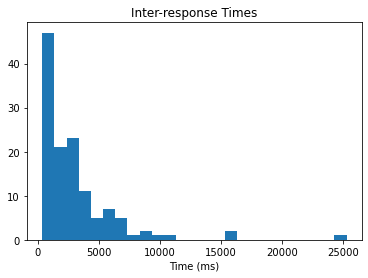

In [20]:
import matplotlib.pyplot as plt
corr_rec_evs =  rec_evs.query('recalled==1')
# corr_rec_evs

irts = list()

for l in np.unique(corr_rec_evs.list):
    list_evs = corr_rec_evs[corr_rec_evs.list==l]
    if len(list_evs):  # not sure if IRTs include time to first recall or only times between (consecutive?) recalls
        irts.append(list_evs.iloc[0].rectime)
    irts.extend(np.diff(list_evs.rectime))

plt.hist(irts, bins=25)
plt.title('Inter-response Times')
plt.xlabel('Time (ms)')
plt.show()

In [21]:
list_evs = corr_rec_evs[corr_rec_evs.list==1]

### Assignment 1

In this assignment you will analyze behavioral data from a big-data study of human memory, using examples from the LTPFR2 dataset. LTPFR2 is a free recall experiment during which each session of 24 lists during which a series of 24 common words are presented for encoding. For each list this is followed by a distractor and then a recall period during which participants attempt to recall as many of the words as they can in any order (free recall). Chapter 1 of Electrophysiology of Human Memory summarizes the principles concerning recall that you will evaluate in this assignment.

Please submit this assignment to Canvas as a Jupyter notebook (.ipynb). 

In [22]:
import matplotlib.pyplot as plt
import cmlreaders as cml
%matplotlib inline

exp = 'ltpFR2'
df = cml.get_data_index('ltp', rootdir='/').query('experiment == @exp')

1. Using the events structure for subject LTP093, filter out WORD type events for the first FR1 session, and use the 'recalled' status of each word presentation to create a serial position curve.  A serial position curve plot should show the serial position index of each word presentation's place in the list across the horizontal axis, and the probability of recall on the vertical axis, obtained from the fraction of words successfully recalled.  Hint: Looking at the evs.columns can help you figure out where the information is that you need.

2. Extend the serial position curve work of part 1, by putting your code to generate the serial position curve data into a function, and using this function in a loop to calculate an average serial position curve across all LTPFR2 sessions for all available subjects (some subjects may not load; you can handle this with a try-except block). Then plot this average serial position curve. Comment on the serial position curve. What effects does it show?

Given there are ~125 subjects with 23 sessions each, loading these data may take some time. You may want to write your code and then test it over a smaller number of subjects.

In [ ]:
def compute_spc(events):
    # TODO

3. For each recalled item, the event data frame contains information on the time at which the recall occurred (relative to the start of the recall period). For a list in which a subject correctly recalled $k$ of the 12 studied items, define the time of each recall as $t_i$ for i ∈ 1 . . . k. Now, for each pair of successively recalled items, compute the inter-response time (IRT) for that transition ($t_i-t_{i−1}$) as a function of two variables: output position, i, and total number of correct recalls, k. Now plot the average IRT as a joint function of $i$ and $k$, with each value of $k$ having a curve of IRT vs. output position. Give a brief explanation of what you found. Explain how you handled recall errors, such as repetitions and intrusions.

4. The Lag Conditional Response Probability (Lag-CRP) is a calculation comparing the serial proximity of recalled words to the possible serial proximities. See http://memory.psych.upenn.edu/CRP_Tutorial for an example of the concept.  Using the first LTPFR2 session of LTP093, calculate and plot the Lag-CRP for the REC_WORD events for lags ranging from -15 to 15. Repeats and intrusions (words not from the list) can appear in the recall events, and must be dealt with. After computing the lag-CRP for LTP093, compute it for all subjects in the LTPFR2 data set and give the between-subject lag-CRP curve (the average across subject-level lag-CRPs). In your report, graph the average lag-CRP separately for the first output position, the 2nd output position, and the 3rd output position. Then graph the data for all output positions combined. What effects do you see in these curves? Clearly explain how you dealt with intrusions and repeated recalls.

5. When subjects incorrectly recall an item that was not studied on the current list it is often an item seen on a recent prior list. We call these errors prior-list intrusions (PLIs) because they are intrusion errors that came from a prior list. For each of lists 10-24, compute the between-subject average proportion of PLIs coming from 1, 2, 3 . . . 8 lists back and plot the resulting curve. Why is it important not to include earlier lists in this analysis? What do these results show?